<a href="https://colab.research.google.com/github/Dabaiee/CS5100group7/blob/renyong/group7_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install keras 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
!pip install --upgrade pandas-datareader

!pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Load the data

In [ ]:

# url = 'https://raw.githubusercontent.com/Dabaiee/CS5100group7/main/ethereumprice_org.csv'
# df = pd.read_csv(url)
# # df = pd.read_csv("ethereumprice_org.csv")
# df

In [ ]:
# ETH-USD
current = dt.datetime.now()
df = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end=current)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.111502
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.507277
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.047249
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.074558
2016-01-08,24.777500,24.190001,24.637501,24.240000,283192000.0,22.191275
...,...,...,...,...,...,...
2022-11-08,141.429993,137.490005,140.410004,139.500000,89908500.0,139.500000
2022-11-09,138.550003,134.589996,138.500000,134.869995,74917800.0,134.869995
2022-11-10,146.869995,139.500000,141.240005,146.869995,118854000.0,146.869995


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1730 entries, 2016-01-04 to 2022-11-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1730 non-null   float64
 1   Low        1730 non-null   float64
 2   Open       1730 non-null   float64
 3   Close      1730 non-null   float64
 4   Volume     1730 non-null   float64
 5   Adj Close  1730 non-null   float64
dtypes: float64(6)
memory usage: 94.6 KB


In [ ]:
df.shape

(1730, 6)

# Visualization

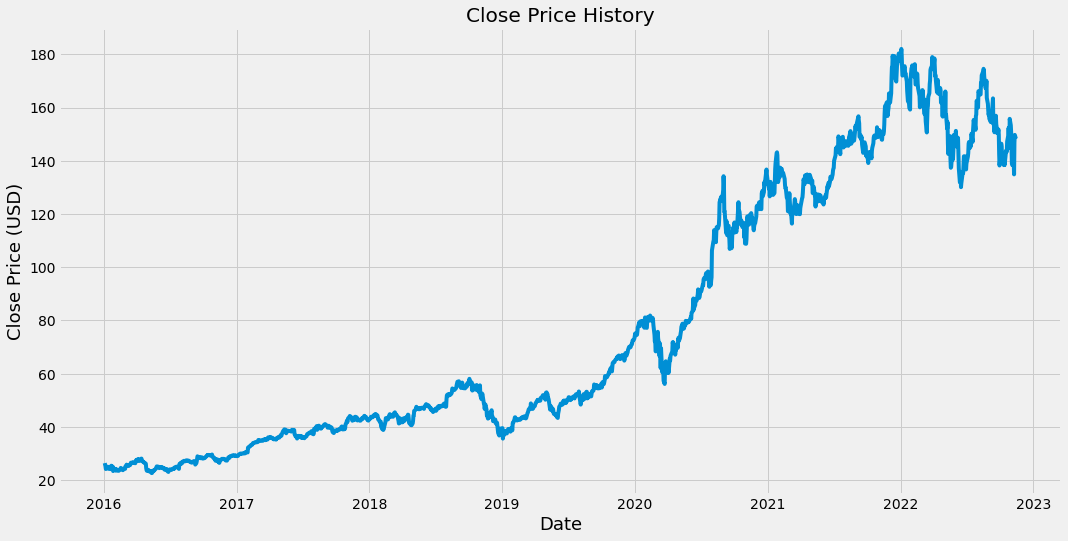

In [ ]:
#visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.show()

In [ ]:
 #create a new dataframe with 'Close' column
data = df.filter(['Close'])
#convert the dataframe into an array
dataset = data.values
#count number of data to train the model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len


1384

In [ ]:
#Scale the data - it is advantage to pre processing the scaling to input data before neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.02353772],
       [0.01939784],
       [0.01624589],
       ...,
       [0.77958287],
       [0.79733418],
       [0.78842718]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data
#split the data into x_train and y_train data sets
#x_train is train feature
x_train = []
#y_train is target var
y_train = []

#we use past continuously 60 days of x to predict the 61st day of y, 
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  # if i <= 61:
  #   print('x',x_train)
  #   print('y',y_train)
  #   print('.............')

In [ ]:
#convert the x_train and y_train to an array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#we start at index 59 -> 60th of x
x_train.shape

(1324, 60)

In [ ]:
#LSTM need input to be 3-D (num of samples, num of time steps, num of features) 
#therefore, need to reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1324, 60, 1)

In [ ]:
from keras.engine import input_layer
#build the LSTM model (continuously dataset)
#LSTM is one of the recurrent neural network
model = Sequential()
#use 50 neurons
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#compile the model
#optimizer is used to improve the loss function (adaptive moment)
#loss function measure the accurate of model on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#train the model
#batch size is the total number of training examples present in a single batch
#epochs is the iterations when an entire dataset is passed forward and backward thru a neural netwok
model.fit(x_train, y_train, batch_size=1, epochs=1)

1324/1324 [==============================] - 51s 36ms/step - loss: 0.0015


In [ ]:
#create the testing data set
#create an new array ontained rest of scaled value (0,1)
test_data = scaled_data[training_data_len - 60:, :]
#create the data set x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

#idea here is we use rest of scaled data （scaled_data * 20%)
#start from index 60 of test_data, in group of 60, and we put 60 numbers into x_test

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
print(len(x_test))
y_test.shape

346


(346, 1)

In [ ]:
#convert the data to a numpy array
x_test = np.array(x_test)
x_test

array([[0.67602324, 0.69258274, 0.68154311, ..., 0.71347032, 0.71742205,
        0.71936653],
       [0.69258274, 0.68154311, 0.70155243, ..., 0.71742205, 0.71936653,
        0.73623968],
       [0.68154311, 0.70155243, 0.68649837, ..., 0.71936653, 0.73623968,
        0.7491611 ],
       ...,
       [0.95320689, 0.95069782, 0.93420109, ..., 0.72971618, 0.73335427,
        0.70431237],
       [0.95069782, 0.93420109, 0.90942457, ..., 0.73335427, 0.70431237,
        0.77958287],
       [0.93420109, 0.90942457, 0.90729184, ..., 0.70431237, 0.77958287,
        0.79733418]])

In [ ]:
#reshape the data x_test to 3-D for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#get the model predicted price values
#use the model with x_test values to get the predicted y
predictions = model.predict(x_test)
#unscalling the values, use inverse the scaled value to noraml value
#we want predictions contain the same values as y_test data set
predictions = scaler.inverse_transform(predictions)

11/11 [==============================] - 1s 15ms/step


In [ ]:
#evaluate the model preform
#get the root mean squares error(RMSE)
#RMSE is measure of how accurate the model predicts
#RMSE is the standard deviation of the residuals

#predictions: get from model with x_test
#y_test: the actural value from data set
rmse = np.sqrt(np.mean(predictions - y_test)** 2)
rmse

6.036973104311552

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


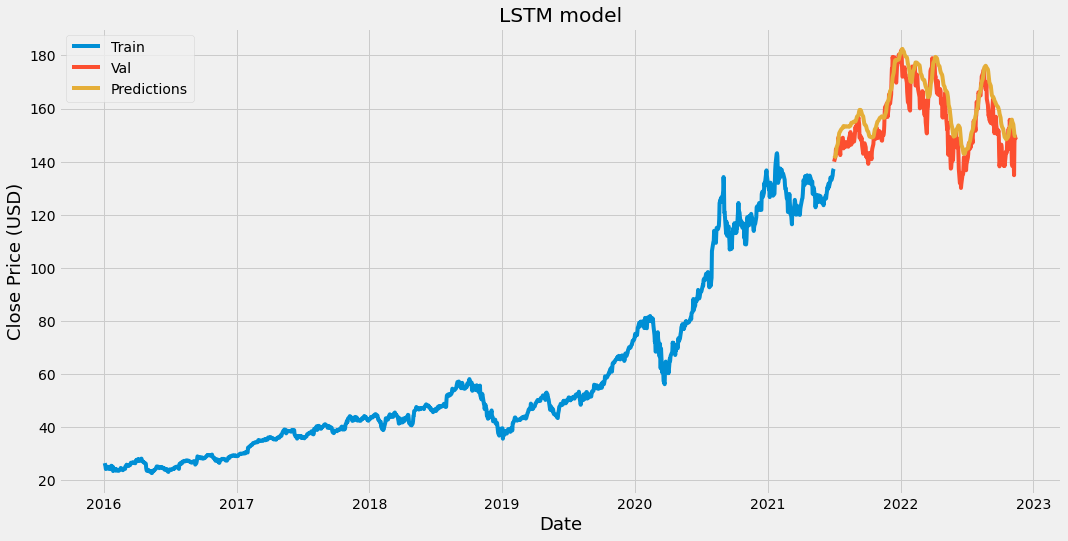

In [ ]:
#plot the data
#80% data as train data
train = data[:training_data_len]
#20% data as valid data
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM model')
plt.xlabel('Date',fontsize = 18)
plt.ylabel('Close Price (USD)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
# plt.plot(valid['Predictions'])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper left')
plt.show()


In [ ]:
#show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-07-02,139.960007,141.255722
2021-07-06,142.020004,142.070023
2021-07-07,144.570007,143.063812
2021-07-08,143.240005,144.274658
2021-07-09,145.110001,145.410538
...,...,...
2022-11-08,139.500000,152.747818
2022-11-09,134.869995,151.561234
2022-11-10,146.869995,150.148529


In [ ]:
quote = df
#create the new data frame
new_df = quote.filter(['Close'])
#get last 60 days values and convert them into array to predict the 61st value
last_60 = new_df[-60:].values
#scale the data using scaler (value between 0 and 1)
#use transform for test values instead train values
last_60_scaled = scaler.transform(last_60)
#create x_test_60
x_test_60 = []

x_test_60.append(last_60_scaled)
#convert the x_test_60 to array
x_test_60 = np.array(x_test_60)
#reshape the data to 3-D
x_test_60 = np.reshape(x_test_60, (x_test_60.shape[0], x_test_60.shape[1],1))
#get predicted scaled price by modle and x_test_60
predict_price = model.predict(x_test_60)
#inverse the scaled price to normal price
predict_price = scaler.inverse_transform(predict_price)
print(predict_price) 


1/1 [==============================] - 0s 23ms/step
[[150.37268]]
